# Exploratory Data Analysis
As the name suggests, during EDA, you get a deeper understanding of the data. During this step, you want to understand your data's statistical characteristics, create visualisations, and test hypothesises.

There are four main types of EDA:

1. `Univariate non-graphical`: Make observations of the population and understand sample distributions of a single variable. (e.g. the measure of spread, the measure of central tendency)

2. `Univariate graphical`: Graphical analysis on a single variable. (e.g. Histograms, Boxplots, Stem and leaf)

3. `Multivariate non-graphical`: Techniques which show the relationship between two or more variables. (e.g. covariance, correlations)

4. `Multivariate graphical`: Graphically show the relationship between two or more variables. (e.g. bar plots, scatterplots)

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats

## 2. Load the dataset

In [2]:
data = pd.read_csv("../data/cleaned_data.csv")
data.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,0
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,1
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,0
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,0
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,0


## 3. Univariate Non-graphical EDA

In [3]:
features = ["absolute_magnitude", "estimated_diameter_min", "estimated_diameter_max", 
            "relative_velocity", "miss_distance"]

In [4]:
# Initialize a dictionary to store the results
summary_stats = {}

In [5]:
# Loop through each feature and compute the required statistics
for feature in features:
    feature_data = data[feature]
    
    # Central Tendency
    mean = feature_data.mean()
    median = feature_data.median()
    mode = feature_data.mode()[0]  # Mode returns a series, so we take the first value
    
    # Spread
    std = feature_data.std()
    var = feature_data.var()
    range_value = feature_data.max() - feature_data.min()
    q1 = feature_data.quantile(0.25)
    q3 = feature_data.quantile(0.75)
    iqr = q3 - q1
    
    # Skewness and Kurtosis
    skew = feature_data.skew()
    kurt = feature_data.kurtosis()
    
    # Store the results in the dictionary
    summary_stats[feature] = {
        'Mean': mean,
        'Median': median,
        'Mode': mode,
        'Std Dev': std,
        'Variance': var,
        'Range': range_value,
        'IQR': iqr,
        'Skewness': skew,
        'Kurtosis': kurt
    }
    
    # Display the statistics for the feature
    print(f"Feature: {feature}")
    print(f"  Mean: {mean}")
    print(f"  Median: {median}")
    print(f"  Mode: {mode}")
    print(f"  Std Dev: {std}")
    print(f"  Variance: {var}")
    print(f"  Range: {range_value}")
    print(f"  IQR: {iqr}")
    print(f"  Skewness: {skew}")
    print(f"  Kurtosis: {kurt}")
    print("-" * 50)

Feature: absolute_magnitude
  Mean: 22.932524959266164
  Median: 22.8
  Mode: 24.4
  Std Dev: 2.911216390292147
  Variance: 8.47518087110564
  Range: 24.33
  IQR: 4.360000000000003
  Skewness: 0.08402052704253546
  Kurtosis: -0.47557705847894116
--------------------------------------------------
Feature: estimated_diameter_min
  Mean: 0.15781204666055487
  Median: 0.0732073989
  Mode: 0.0350392641
  Std Dev: 0.3138851378797346
  Variance: 0.09852387978178001
  Range: 37.5447367783
  IQR: 0.163656849
  Skewness: 30.963263588764914
  Kurtosis: 2664.6036246371696
--------------------------------------------------
Feature: estimated_diameter_max
  Mean: 0.352878464000549
  Median: 0.1636967205
  Mode: 0.0783501764
  Std Dev: 0.7018685054244151
  Variance: 0.4926193989067022
  Range: 83.9525836336
  IQR: 0.36594783929999997
  Skewness: 30.963263588892026
  Kurtosis: 2664.6036246477115
--------------------------------------------------
Feature: relative_velocity
  Mean: 51060.01799447809
  M

## 4. Univariate Graphical EDA

In [6]:
# Define a function to create univariate plots
def univariate_graphical_analysis(df, feature):
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[feature], kde=True, color='blue', bins=10)
    plt.title(f'Histogram of {feature}')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[feature], color='green')
    plt.title(f'Boxplot of {feature}')

    # Stem Plot
    plt.subplot(1, 3, 3)
    plt.stem(df[feature], linefmt="C3-", markerfmt="C3o", basefmt="C0-")
    plt.title(f'Stem Plot of {feature}')
    plt.xlabel("Index")
    plt.ylabel(feature)

    plt.tight_layout()

    plt.show()


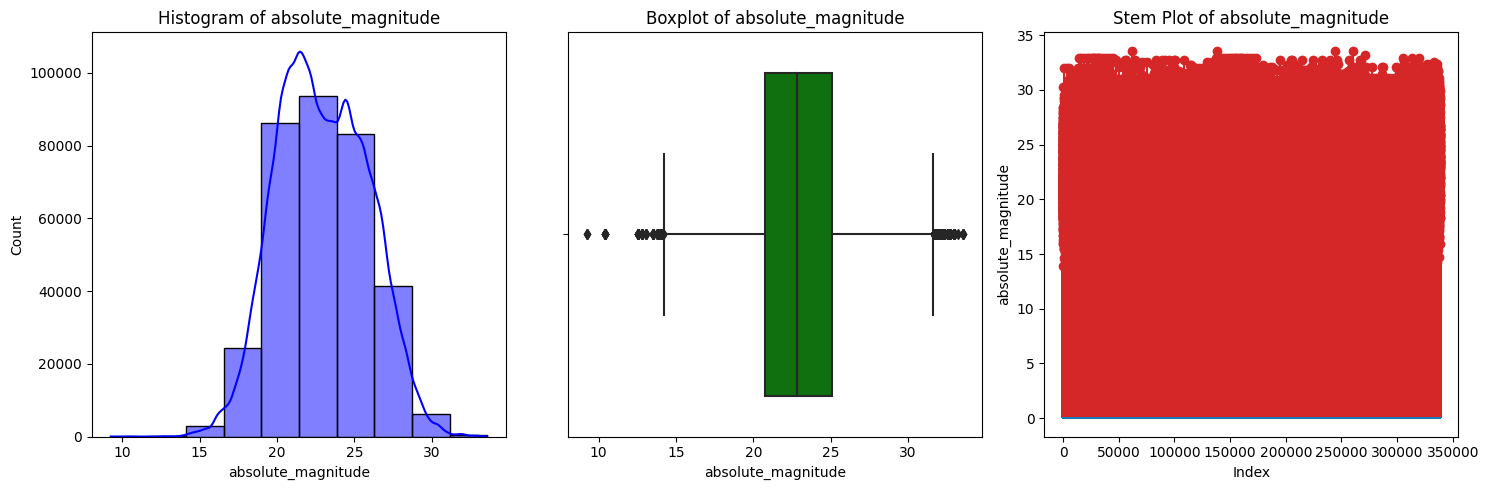

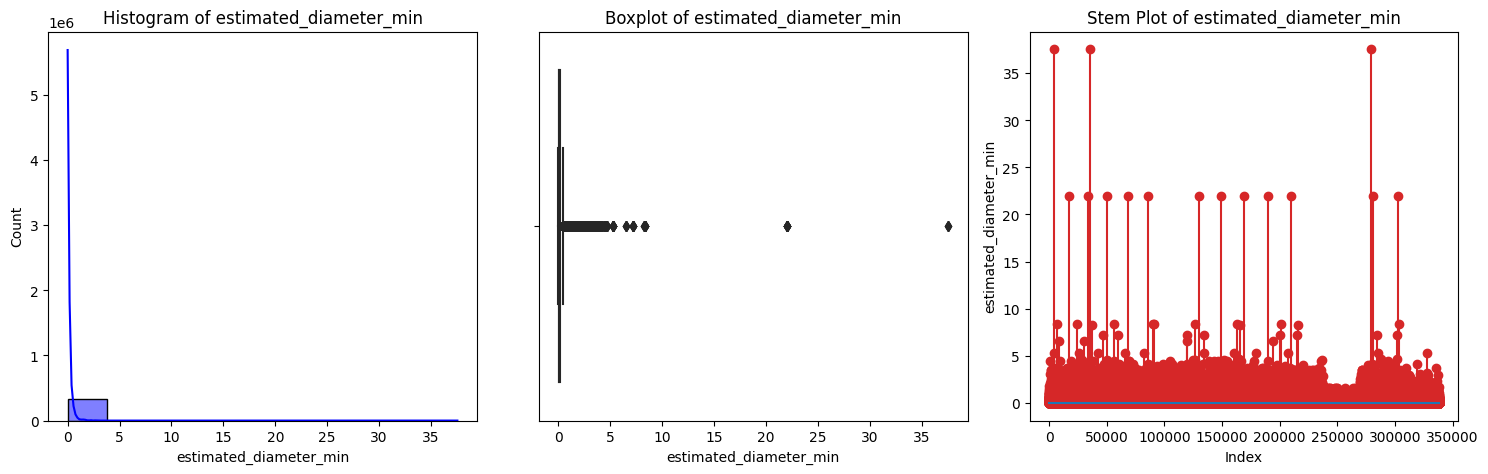

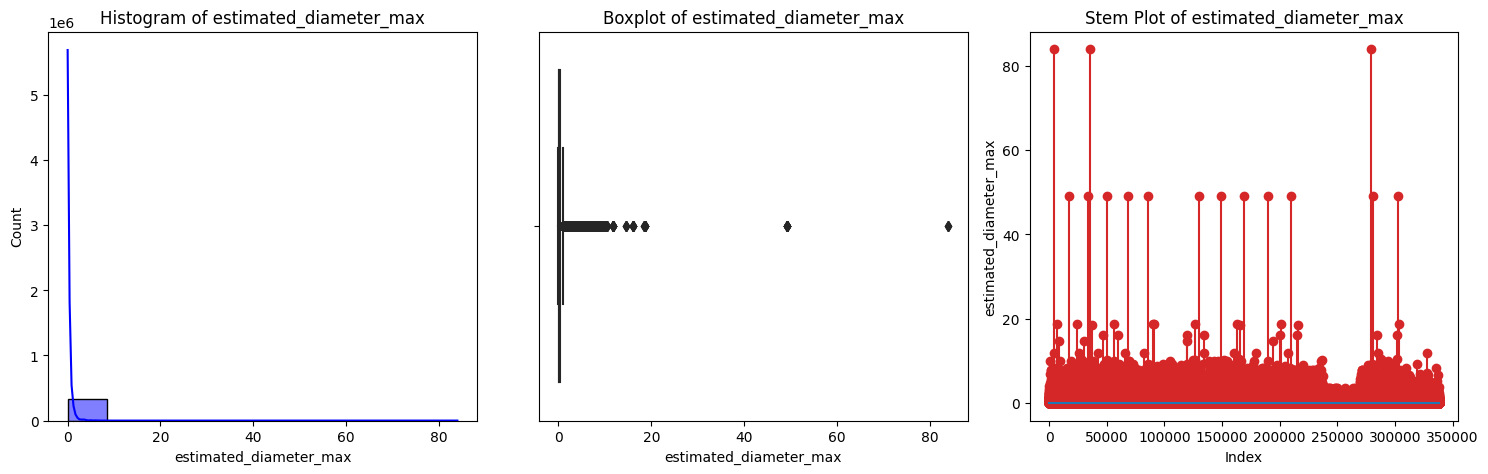

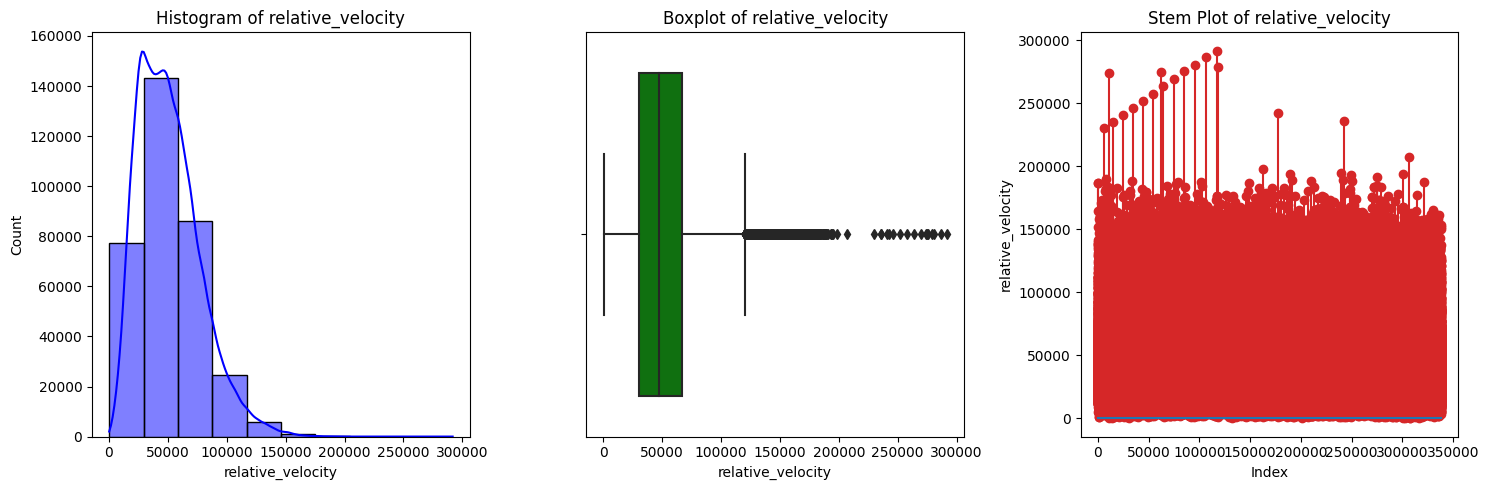

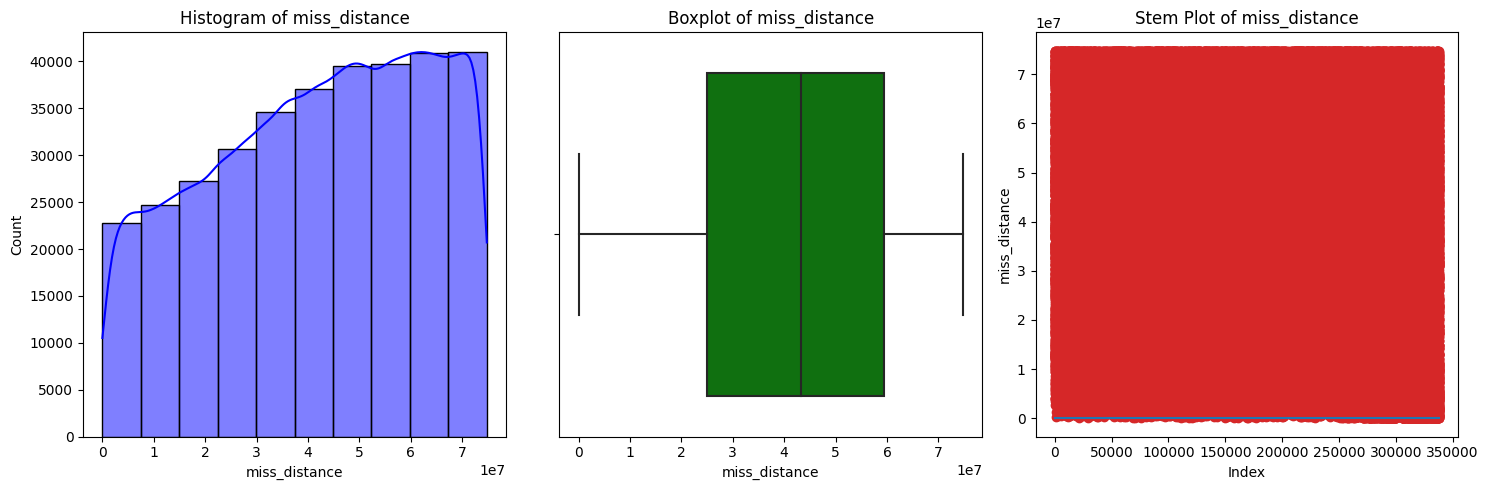

In [11]:
# Generate univariate analysis for each feature
for feature in features:
    univariate_graphical_analysis(data[features], feature)

## 5. Multivariate non-graphical

In [12]:

# Calculate covariance matrix
cov_matrix = data[features].cov()

# Calculate correlation matrix
corr_matrix = data[features].corr()

# Display covariance and correlation matrices
print("Covariance Matrix:")
print(cov_matrix)

print("\nCorrelation Matrix:")
print(corr_matrix)


Covariance Matrix:
                        absolute_magnitude  estimated_diameter_min  \
absolute_magnitude            8.475181e+00               -0.543380   
estimated_diameter_min       -5.433800e-01                0.098524   
estimated_diameter_max       -1.215035e+00                0.220306   
relative_velocity            -2.655905e+04             1843.205823   
miss_distance                -1.291344e+07           726890.973396   

                        estimated_diameter_max  relative_velocity  \
absolute_magnitude               -1.215035e+00      -2.655905e+04   
estimated_diameter_min            2.203061e-01       1.843206e+03   
estimated_diameter_max            4.926194e-01       4.121534e+03   
relative_velocity                 4.121534e+03       6.969559e+08   
miss_distance                     1.625378e+06       1.769194e+11   

                        miss_distance  
absolute_magnitude      -1.291344e+07  
estimated_diameter_min   7.268910e+05  
estimated_diameter_max   

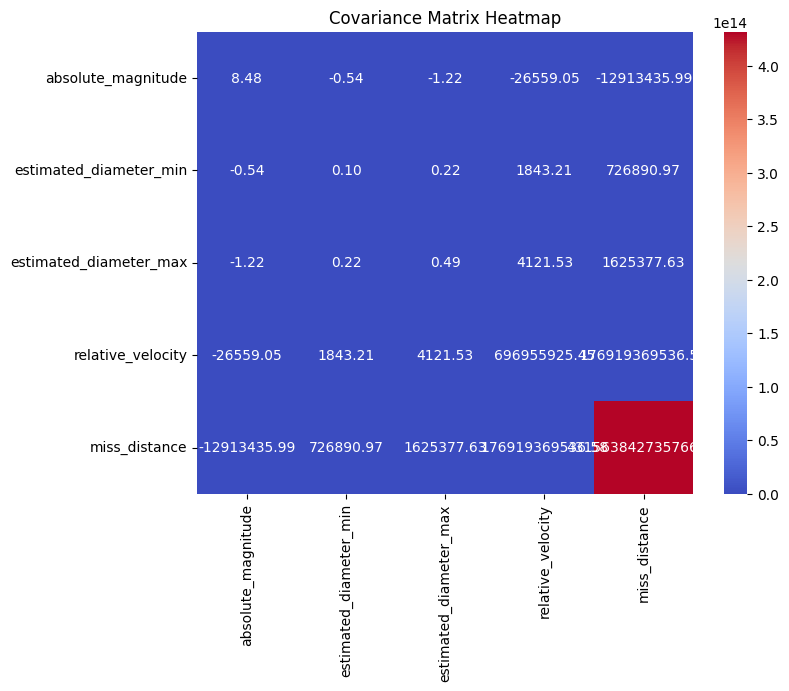

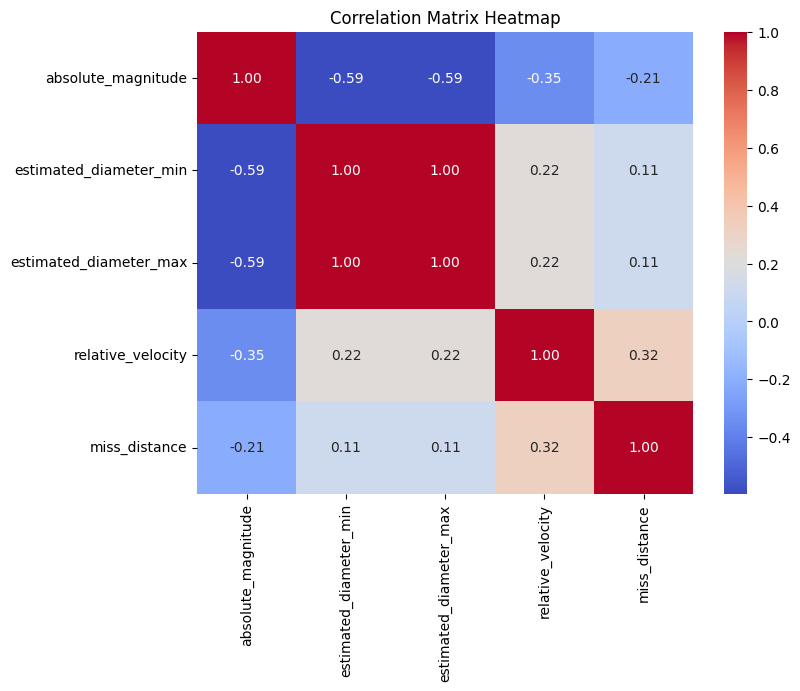

In [13]:
# Covariance heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Covariance Matrix Heatmap")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

## 6. Multivariate Graphical

/home/surajkarki/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


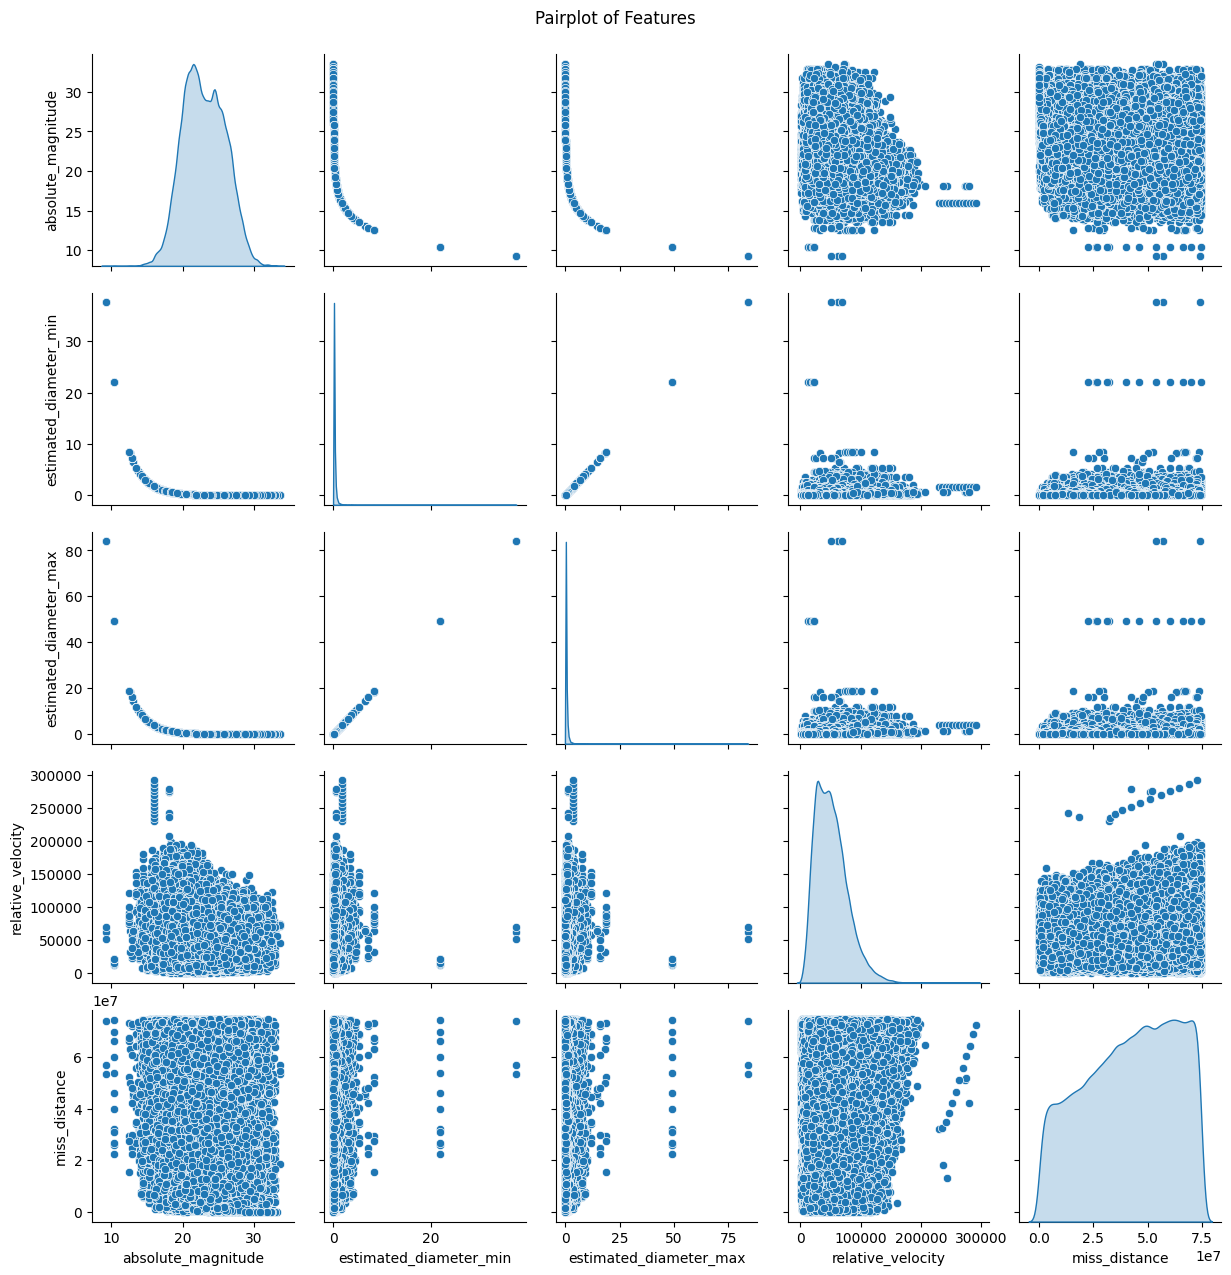

In [15]:
# Pairplot to show relationships between all variables
sns.pairplot(data[features], diag_kind="kde")
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

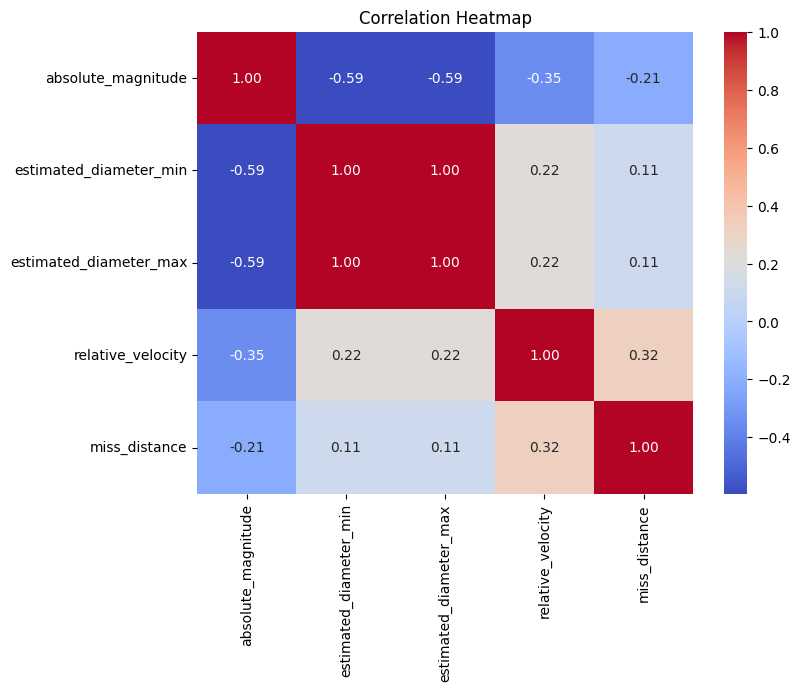

In [16]:
# Heatmap to show correlations visually
plt.figure(figsize=(8, 6))
sns.heatmap(data[features].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

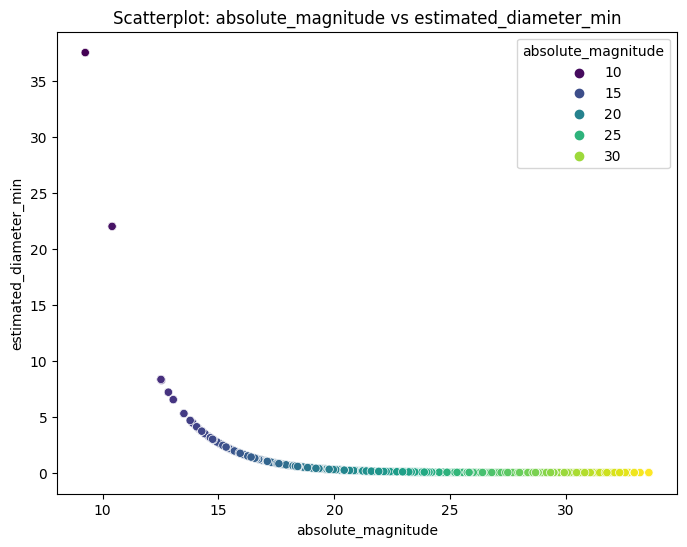

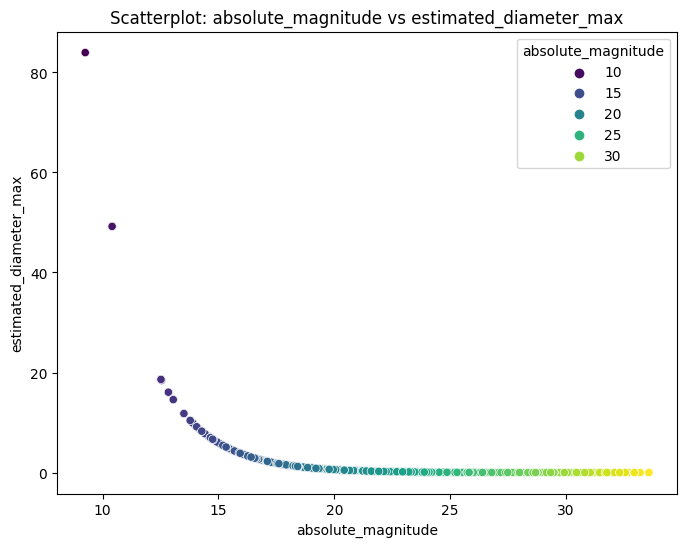

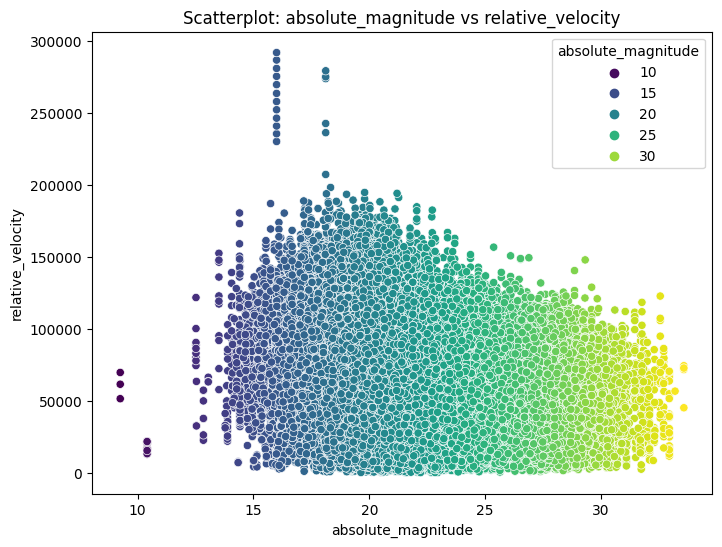

/home/surajkarki/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


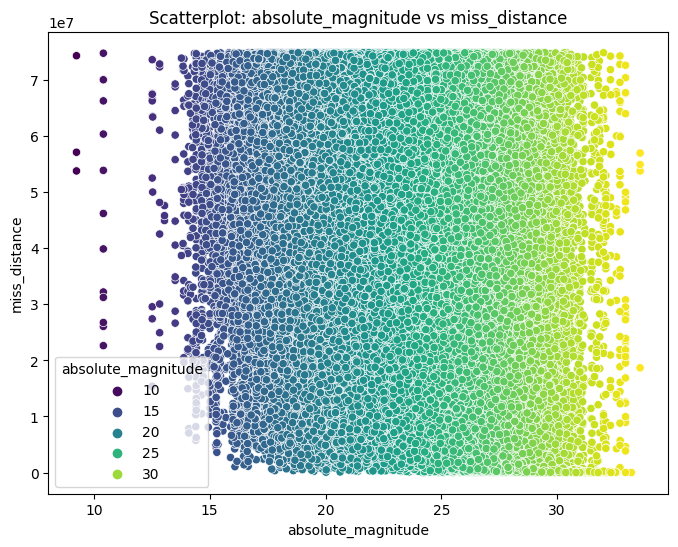

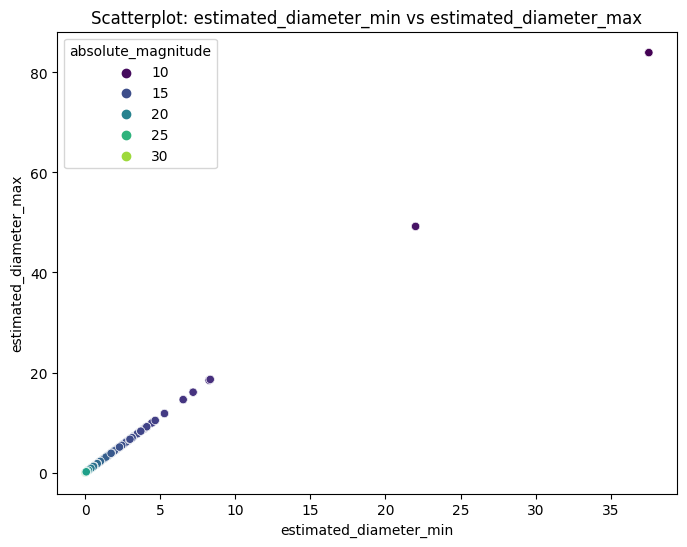

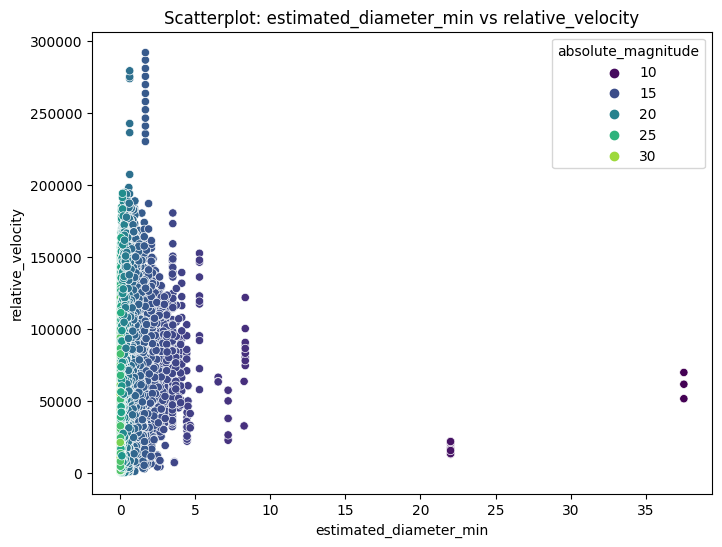

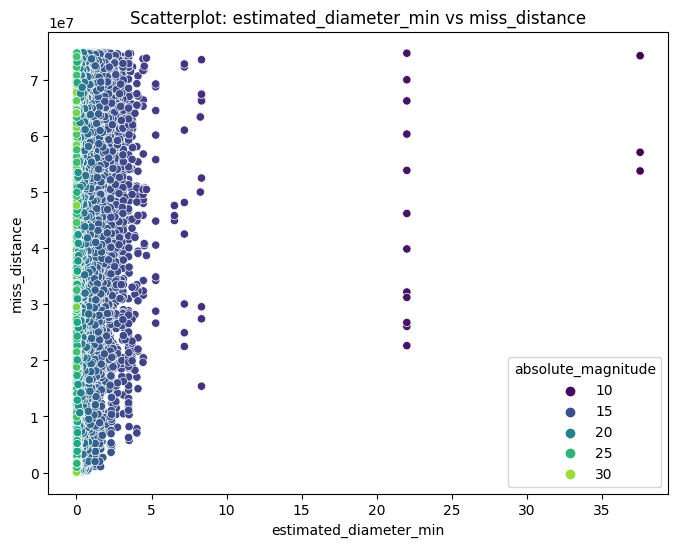

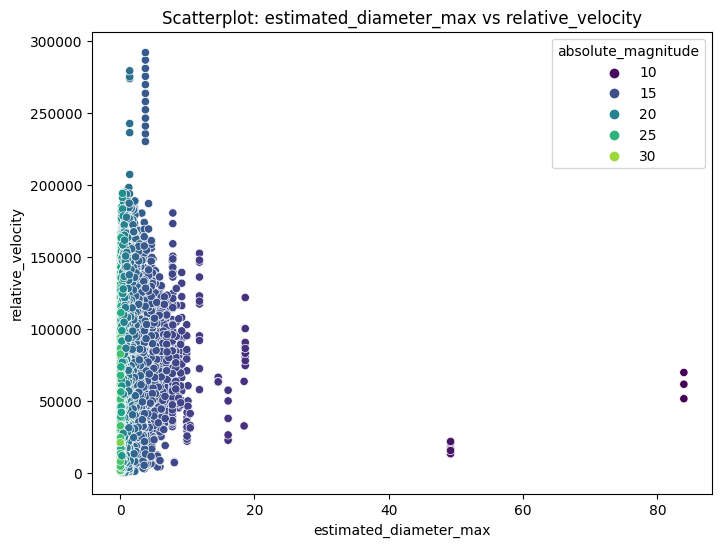

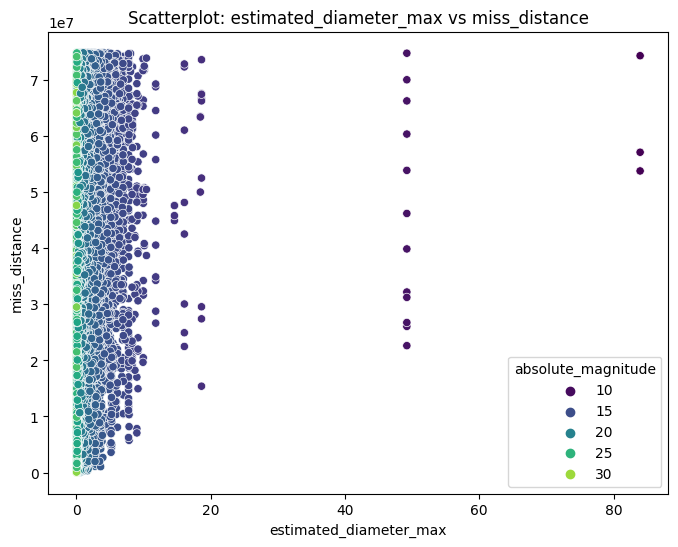

/home/surajkarki/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


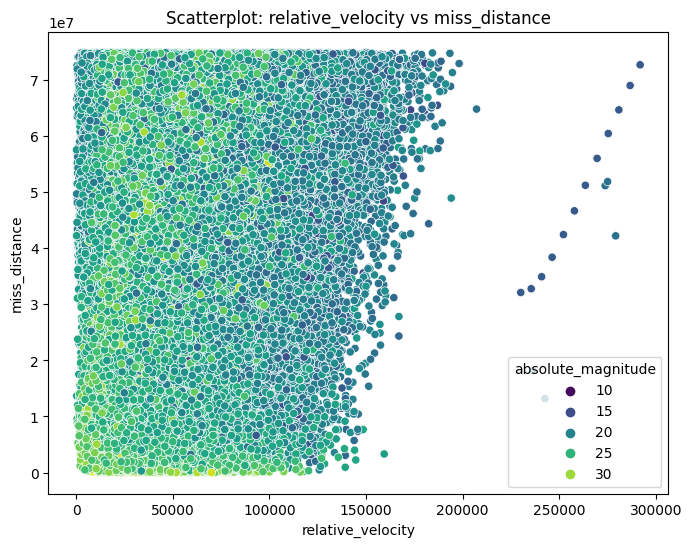

In [18]:
# Scatter plot for all combinations of features
def scatter_plots(df, features):
    n = len(features)
    
    # Create scatter plots for all combinations of features
    for i in range(n):
        for j in range(i+1, n):
            plt.figure(figsize=(8, 6))
            sns.scatterplot(data=df, x=features[i], y=features[j], hue="absolute_magnitude", palette="viridis")
            plt.title(f"Scatterplot: {features[i]} vs {features[j]}")
            plt.xlabel(features[i])
            plt.ylabel(features[j])
            plt.show()
scatter_plots(data[features], features)